---
# Jeanette's Workbook
---


In [1]:
import pandas as pd

# Acquire
import requests
from bs4 import BeautifulSoup
import api

# Explore
import matplotlib.pyplot as plt
import seaborn as sns

# Blocking Warning Boxes
import warnings
warnings.filterwarnings("ignore")

# Remove Limits On Viewing Dataframes
pd.set_option('display.max_columns', None)

# Suppress scientific notation
pd.options.display.float_format = '{:.2f}'.format


---
# Acquire
---

### Aggregated US Data

In [2]:
# Collecting the data from the API and converting it into a csv
csv_url = f'https://api.covidactnow.org/v2/country/US.timeseries.csv?apiKey={api.key}'
req = requests.get(csv_url)
url_content = req.content

# Create a csv and open it to recieve content
csv_file = open('aggregated_us_data.csv', 'wb')

# Write content into csv file
csv_file.write(url_content)

# Save and Close csv file
csv_file.close()

### States Data

In [3]:
# Collecting the data from the API and converting it into a csv
csv_url = f'https://api.covidactnow.org/v2/states.timeseries.csv?apiKey={api.key}'
req = requests.get(csv_url)
url_content = req.content

# Create a csv and open it to recieve content
csv_file = open('states_data.csv', 'wb')

# Write content into csv file
csv_file.write(url_content)

# Save and Close csv file
csv_file.close()

### Counties Data

In [4]:
# Collecting the data from the API and converting it into a csv
csv_url = f'https://api.covidactnow.org/v2/counties.timeseries.csv?apiKey={api.key}'
req = requests.get(csv_url)
url_content = req.content

# Create a csv and open it to recieve content
csv_file = open('counties_data.csv', 'wb')

# Write content into csv file
csv_file.write(url_content)

# Save and Close csv file
csv_file.close()

---
# Prepare
---

In [5]:
# Read the csv into a dataframe
covid = pd.read_csv('aggregated_us_data.csv', index_col=0)
covid.head()

,country,state,county,fips,lat,long,locationId,actuals.cases,actuals.deaths,actuals.positiveTests,actuals.negativeTests,actuals.contactTracers,actuals.hospitalBeds.capacity,actuals.hospitalBeds.currentUsageTotal,actuals.hospitalBeds.currentUsageCovid,unused1,actuals.icuBeds.capacity,actuals.icuBeds.currentUsageTotal,actuals.icuBeds.currentUsageCovid,unused2,actuals.newCases,actuals.vaccinesDistributed,actuals.vaccinationsInitiated,actuals.vaccinationsCompleted,metrics.testPositivityRatio,metrics.testPositivityRatioDetails,metrics.caseDensity,metrics.contactTracerCapacityRatio,metrics.infectionRate,metrics.infectionRateCI90,unused3,unused4,metrics.icuCapacityRatio,riskLevels.overall,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,actuals.newDeaths,actuals.vaccinesAdministered,riskLevels.caseDensity,cdcTransmissionLevel,actuals.vaccinationsAdditionalDose,metrics.vaccinationsAdditionalDoseRatio,metrics.weeklyNewCasesPer100k,hsa,hsaPopulation,actuals.hsaHospitalBeds.capacity,actuals.hsaHospitalBeds.currentUsageTotal,actuals.hsaHospitalBeds.currentUsageCovid,actuals.hsaIcuBeds.capacity,actuals.hsaIcuBeds.currentUsageTotal,actuals.hsaIcuBeds.currentUsageCovid,metrics.bedsWithCovidPatientsRatio,hsaName,actuals.hospitalBeds.weeklyCovidAdmissions,actuals.hsaHospitalBeds.weeklyCovidAdmissions,metrics.weeklyCovidAdmissionsPer100k,communityLevels.cdcCommunityLevel,communityLevels.canCommunityLevel
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-21,US,NaN,NaN,0,NaN,NaN,iso1:us,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,US,NaN,NaN,0,NaN,NaN,iso1:us,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0.00,NaN,0,0,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,US,NaN,NaN,0,NaN,NaN,iso1:us,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,1.12,1.04,NaN,NaN,NaN,0,NaN,NaN,0.00,NaN,0,0,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,US,NaN,NaN,0,NaN,NaN,iso1:us,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,1.13,1.02,NaN,NaN,NaN,0,NaN,NaN,0.00,NaN,0,0,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,US,NaN,NaN,0,NaN,NaN,iso1:us,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,1.14,1.01,NaN,NaN,NaN,0,NaN,NaN,0.00,NaN,0,0,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# How big is this dataframe?
covid.shape

(812, 58)

In [7]:
# How many nulls are in the data? 
covid.isna().sum()

country                                            0
state                                            812
county                                           812
fips                                               0
lat                                              812
long                                             812
locationId                                         0
actuals.cases                                      0
actuals.deaths                                     0
actuals.positiveTests                             63
actuals.negativeTests                             58
actuals.contactTracers                           205
actuals.hospitalBeds.capacity                    268
actuals.hospitalBeds.currentUsageTotal           268
actuals.hospitalBeds.currentUsageCovid           268
unused1                                          812
actuals.icuBeds.capacity                         268
actuals.icuBeds.currentUsageTotal                268
actuals.icuBeds.currentUsageCovid             

In [8]:
# There are some columns with no data, so I'm gonna drop those
covid.drop(columns=['state',
                   'county',
                   'lat',
                   'long',
                   'unused1',
                   'unused2',
                   'metrics.testPositivityRatioDetails',
                   'unused3',
                   'unused4'], inplace=True)

covid.isna().sum()

country                                            0
fips                                               0
locationId                                         0
actuals.cases                                      0
actuals.deaths                                     0
actuals.positiveTests                             63
actuals.negativeTests                             58
actuals.contactTracers                           205
actuals.hospitalBeds.capacity                    268
actuals.hospitalBeds.currentUsageTotal           268
actuals.hospitalBeds.currentUsageCovid           268
actuals.icuBeds.capacity                         268
actuals.icuBeds.currentUsageTotal                268
actuals.icuBeds.currentUsageCovid                268
actuals.newCases                                   2
actuals.vaccinesDistributed                      328
actuals.vaccinationsInitiated                    328
actuals.vaccinationsCompleted                    328
metrics.testPositivityRatio                   

In [9]:
# Now I'll drop those columns missing more than half thier data
covid.drop(columns=['actuals.vaccinesDistributed',
                   'actuals.vaccinationsInitiated',
                   'actuals.vaccinationsCompleted',
                   'metrics.vaccinationsInitiatedRatio',
                   'metrics.vaccinationsCompletedRatio',
                   'actuals.vaccinesAdministered',
                   'actuals.vaccinationsAdditionalDose',
                   'metrics.vaccinationsAdditionalDoseRatio'], inplace=True)

covid.isna().sum()

country                                            0
fips                                               0
locationId                                         0
actuals.cases                                      0
actuals.deaths                                     0
actuals.positiveTests                             63
actuals.negativeTests                             58
actuals.contactTracers                           205
actuals.hospitalBeds.capacity                    268
actuals.hospitalBeds.currentUsageTotal           268
actuals.hospitalBeds.currentUsageCovid           268
actuals.icuBeds.capacity                         268
actuals.icuBeds.currentUsageTotal                268
actuals.icuBeds.currentUsageCovid                268
actuals.newCases                                   2
metrics.testPositivityRatio                       63
metrics.caseDensity                                1
metrics.contactTracerCapacityRatio               206
metrics.infectionRate                         

In [10]:
covid.head()

,country,fips,locationId,actuals.cases,actuals.deaths,actuals.positiveTests,actuals.negativeTests,actuals.contactTracers,actuals.hospitalBeds.capacity,actuals.hospitalBeds.currentUsageTotal,actuals.hospitalBeds.currentUsageCovid,actuals.icuBeds.capacity,actuals.icuBeds.currentUsageTotal,actuals.icuBeds.currentUsageCovid,actuals.newCases,metrics.testPositivityRatio,metrics.caseDensity,metrics.contactTracerCapacityRatio,metrics.infectionRate,metrics.infectionRateCI90,metrics.icuCapacityRatio,riskLevels.overall,actuals.newDeaths,riskLevels.caseDensity,cdcTransmissionLevel,metrics.weeklyNewCasesPer100k,hsa,hsaPopulation,actuals.hsaHospitalBeds.capacity,actuals.hsaHospitalBeds.currentUsageTotal,actuals.hsaHospitalBeds.currentUsageCovid,actuals.hsaIcuBeds.capacity,actuals.hsaIcuBeds.currentUsageTotal,actuals.hsaIcuBeds.currentUsageCovid,metrics.bedsWithCovidPatientsRatio,hsaName,actuals.hospitalBeds.weeklyCovidAdmissions,actuals.hsaHospitalBeds.weeklyCovidAdmissions,metrics.weeklyCovidAdmissionsPer100k,communityLevels.cdcCommunityLevel,communityLevels.canCommunityLevel
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-21,US,0,iso1:us,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0,NaN,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,US,0,iso1:us,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN,NaN,NaN,NaN,0,0.00,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,US,0,iso1:us,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN,1.12,1.04,NaN,0,0.00,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,US,0,iso1:us,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,0.00,NaN,1.13,1.02,NaN,0,0.00,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,US,0,iso1:us,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,0.00,NaN,1.14,1.01,NaN,0,0.00,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Is there a need for fips?
# It looks like there is only one value so it should be safe to drop
covid.fips.value_counts()

0    812
Name: fips, dtype: int64

In [12]:
# Can I drop location too?
covid.locationId.value_counts()

iso1:us    812
Name: locationId, dtype: int64

In [13]:
# Does 'actuals.deaths' have variety?
covid['actuals.deaths'].value_counts().head()

0         39
12         2
613440     1
610299     1
610400     1
Name: actuals.deaths, dtype: int64

Yes, there is variety in 'actuals.deaths' so I'll keep it.

In [14]:
# I'll drop the location columns because they all say the same thing
covid.drop(columns=['country',
                    'fips', 
                    'locationId'], inplace=True)
covid.head()

,actuals.cases,actuals.deaths,actuals.positiveTests,actuals.negativeTests,actuals.contactTracers,actuals.hospitalBeds.capacity,actuals.hospitalBeds.currentUsageTotal,actuals.hospitalBeds.currentUsageCovid,actuals.icuBeds.capacity,actuals.icuBeds.currentUsageTotal,actuals.icuBeds.currentUsageCovid,actuals.newCases,metrics.testPositivityRatio,metrics.caseDensity,metrics.contactTracerCapacityRatio,metrics.infectionRate,metrics.infectionRateCI90,metrics.icuCapacityRatio,riskLevels.overall,actuals.newDeaths,riskLevels.caseDensity,cdcTransmissionLevel,metrics.weeklyNewCasesPer100k,hsa,hsaPopulation,actuals.hsaHospitalBeds.capacity,actuals.hsaHospitalBeds.currentUsageTotal,actuals.hsaHospitalBeds.currentUsageCovid,actuals.hsaIcuBeds.capacity,actuals.hsaIcuBeds.currentUsageTotal,actuals.hsaIcuBeds.currentUsageCovid,metrics.bedsWithCovidPatientsRatio,hsaName,actuals.hospitalBeds.weeklyCovidAdmissions,actuals.hsaHospitalBeds.weeklyCovidAdmissions,metrics.weeklyCovidAdmissionsPer100k,communityLevels.cdcCommunityLevel,communityLevels.canCommunityLevel
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-21,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0,NaN,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN,NaN,NaN,NaN,0,0.00,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN,1.12,1.04,NaN,0,0.00,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,0.00,NaN,1.13,1.02,NaN,0,0.00,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,0.00,NaN,1.14,1.01,NaN,0,0.00,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
covid.isna().sum()

actuals.cases                                      0
actuals.deaths                                     0
actuals.positiveTests                             63
actuals.negativeTests                             58
actuals.contactTracers                           205
actuals.hospitalBeds.capacity                    268
actuals.hospitalBeds.currentUsageTotal           268
actuals.hospitalBeds.currentUsageCovid           268
actuals.icuBeds.capacity                         268
actuals.icuBeds.currentUsageTotal                268
actuals.icuBeds.currentUsageCovid                268
actuals.newCases                                   2
metrics.testPositivityRatio                       63
metrics.caseDensity                                1
metrics.contactTracerCapacityRatio               206
metrics.infectionRate                              2
metrics.infectionRateCI90                          2
metrics.icuCapacityRatio                         268
riskLevels.overall                            

In [16]:
# Okay I shouldn't have this many columns left
# I'm gonna make a function that drops all columns with more than 30% nulls

def drop_null_columns(dataframe):
    # make a list of the columns
    column_list = dataframe.columns.to_list()
    
    for column in column_list:
        # check if column has more than 30% nulls
        if ((dataframe[column].isna().sum()) / dataframe.shape[0]) > 0.30 :
            # if more than 30% nulls drop the column
            dataframe.drop(columns=[column], inplace=True)
    
    return dataframe

In [17]:
# Using my new function
drop_null_columns(covid)

# Check the numbers
covid.isna().sum()

actuals.cases                           0
actuals.deaths                          0
actuals.positiveTests                  63
actuals.negativeTests                  58
actuals.contactTracers                205
actuals.newCases                        2
metrics.testPositivityRatio            63
metrics.caseDensity                     1
metrics.contactTracerCapacityRatio    206
metrics.infectionRate                   2
metrics.infectionRateCI90               2
riskLevels.overall                      0
actuals.newDeaths                       3
riskLevels.caseDensity                  0
cdcTransmissionLevel                    0
metrics.weeklyNewCasesPer100k           1
dtype: int64

In [18]:
covid.head()

,actuals.cases,actuals.deaths,actuals.positiveTests,actuals.negativeTests,actuals.contactTracers,actuals.newCases,metrics.testPositivityRatio,metrics.caseDensity,metrics.contactTracerCapacityRatio,metrics.infectionRate,metrics.infectionRateCI90,riskLevels.overall,actuals.newDeaths,riskLevels.caseDensity,cdcTransmissionLevel,metrics.weeklyNewCasesPer100k
date,,,,,,,,,,,,,,,,
2020-01-21,1,0,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0,NaN,0,0,0.00
2020-01-22,1,0,NaN,NaN,NaN,0.00,NaN,0.00,NaN,NaN,NaN,0,0.00,0,0,0.00
2020-01-23,1,0,NaN,NaN,NaN,0.00,NaN,0.00,NaN,1.12,1.04,0,0.00,0,0,0.00
2020-01-24,2,0,NaN,NaN,NaN,1.00,NaN,0.00,NaN,1.13,1.02,0,0.00,0,0,0.00
2020-01-25,3,0,NaN,NaN,NaN,1.00,NaN,0.00,NaN,1.14,1.01,0,0.00,0,0,0.00


In [19]:
# Read states data csv into a dataframe
states = pd.read_csv('states_data.csv', index_col=0)
states.head()

,country,state,county,fips,lat,long,locationId,actuals.cases,actuals.deaths,actuals.positiveTests,actuals.negativeTests,actuals.contactTracers,actuals.hospitalBeds.capacity,actuals.hospitalBeds.currentUsageTotal,actuals.hospitalBeds.currentUsageCovid,unused1,actuals.icuBeds.capacity,actuals.icuBeds.currentUsageTotal,actuals.icuBeds.currentUsageCovid,unused2,actuals.newCases,actuals.vaccinesDistributed,actuals.vaccinationsInitiated,actuals.vaccinationsCompleted,metrics.testPositivityRatio,metrics.testPositivityRatioDetails,metrics.caseDensity,metrics.contactTracerCapacityRatio,metrics.infectionRate,metrics.infectionRateCI90,unused3,unused4,metrics.icuCapacityRatio,riskLevels.overall,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,actuals.newDeaths,actuals.vaccinesAdministered,riskLevels.caseDensity,cdcTransmissionLevel,actuals.vaccinationsAdditionalDose,metrics.vaccinationsAdditionalDoseRatio,metrics.weeklyNewCasesPer100k,hsa,hsaPopulation,actuals.hsaHospitalBeds.capacity,actuals.hsaHospitalBeds.currentUsageTotal,actuals.hsaHospitalBeds.currentUsageCovid,actuals.hsaIcuBeds.capacity,actuals.hsaIcuBeds.currentUsageTotal,actuals.hsaIcuBeds.currentUsageCovid,metrics.bedsWithCovidPatientsRatio,hsaName,actuals.hospitalBeds.weeklyCovidAdmissions,actuals.hsaHospitalBeds.weeklyCovidAdmissions,metrics.weeklyCovidAdmissionsPer100k,communityLevels.cdcCommunityLevel,communityLevels.canCommunityLevel
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-01,US,AK,NaN,2,NaN,NaN,iso1:us#iso2:us-ak,NaN,NaN,NaN,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-02,US,AK,NaN,2,NaN,NaN,iso1:us#iso2:us-ak,NaN,NaN,NaN,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-03,US,AK,NaN,2,NaN,NaN,iso1:us#iso2:us-ak,NaN,NaN,NaN,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-04,US,AK,NaN,2,NaN,NaN,iso1:us#iso2:us-ak,NaN,NaN,NaN,18.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-05,US,AK,NaN,2,NaN,NaN,iso1:us#iso2:us-ak,NaN,NaN,NaN,27.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
states[states.state == 'TX'].shape

(790, 58)

---
# Explore
---

In [21]:
def view_hist(dataframe):
    # make a list of the columns
    column_list = dataframe.columns.to_list()
    
    for column in column_list:
        dataframe[column].hist()
        plt.title(column)
        plt.show()
    return 

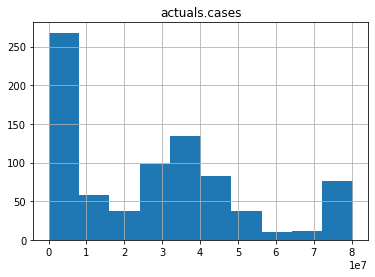

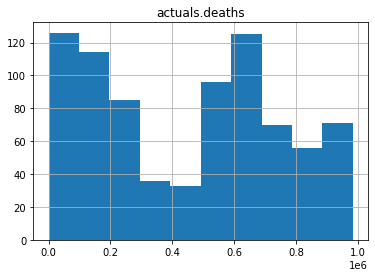

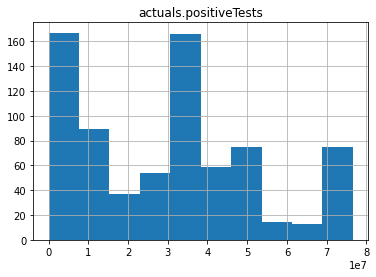

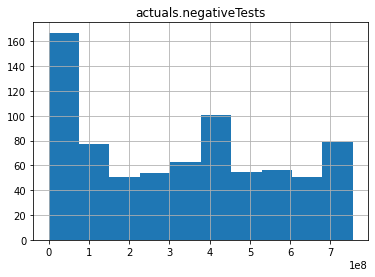

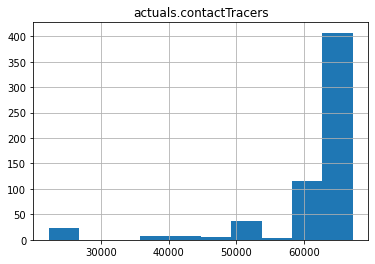

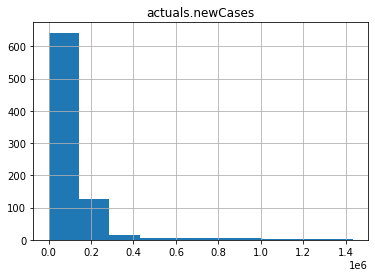

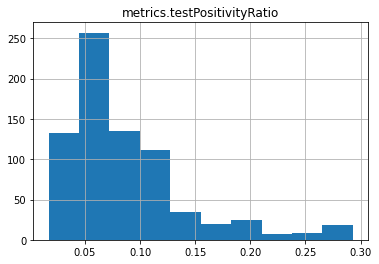

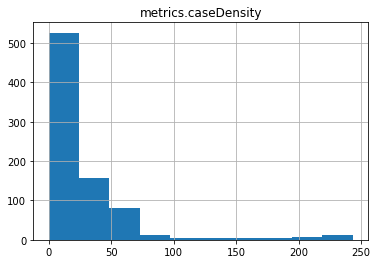

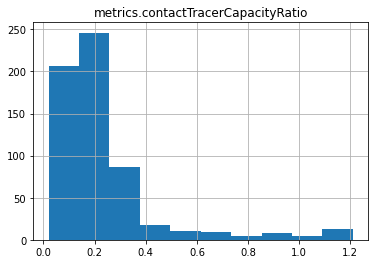

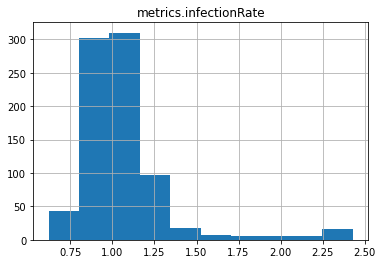

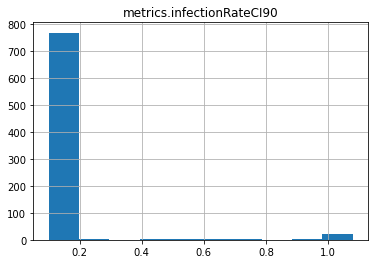

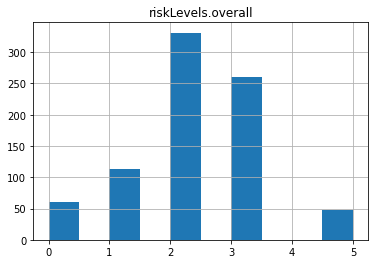

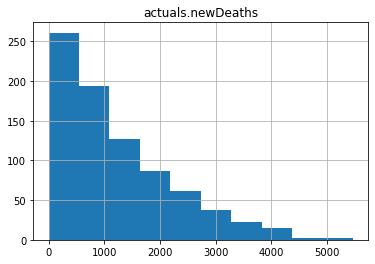

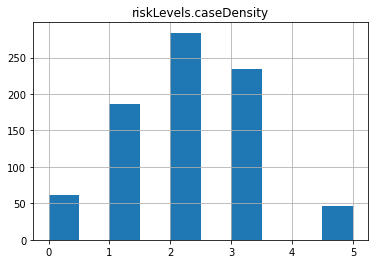

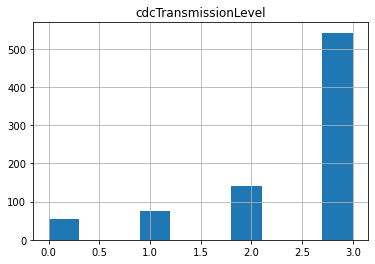

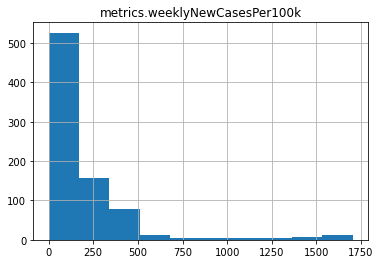

In [22]:
# Lets look atthe histograms for each column
view_hist(covid)

In [23]:
#type check
covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 812 entries, 2020-01-21 to 2022-04-11
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   actuals.cases                       812 non-null    int64  
 1   actuals.deaths                      812 non-null    int64  
 2   actuals.positiveTests               749 non-null    float64
 3   actuals.negativeTests               754 non-null    float64
 4   actuals.contactTracers              607 non-null    float64
 5   actuals.newCases                    810 non-null    float64
 6   metrics.testPositivityRatio         749 non-null    float64
 7   metrics.caseDensity                 811 non-null    float64
 8   metrics.contactTracerCapacityRatio  606 non-null    float64
 9   metrics.infectionRate               810 non-null    float64
 10  metrics.infectionRateCI90           810 non-null    float64
 11  riskLevels.overall                

In [24]:
# make a list of the columns to convert
# these should be floats: metrics.caseDensity , metrics.infectionRate, metrics.infectionRateCI90, metrics.weeklyNewCasesPer100k
# everything else should be an integer
floats_to_ints= ['actuals.positiveTests',
                 'actuals.negativeTests',
                 'actuals.contactTracers',
                 'actuals.newCases',
                 'metrics.testPositivityRatio',
                 'metrics.contactTracerCapacityRatio',
                 'actuals.newDeaths']

# convert the list of columns into integers
for column in floats_to_ints:
    covid[column] = covid[column].astype(int, errors='ignore')

In [25]:
# the columns didn't convert.... why?
covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 812 entries, 2020-01-21 to 2022-04-11
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   actuals.cases                       812 non-null    int64  
 1   actuals.deaths                      812 non-null    int64  
 2   actuals.positiveTests               749 non-null    float64
 3   actuals.negativeTests               754 non-null    float64
 4   actuals.contactTracers              607 non-null    float64
 5   actuals.newCases                    810 non-null    float64
 6   metrics.testPositivityRatio         749 non-null    float64
 7   metrics.caseDensity                 811 non-null    float64
 8   metrics.contactTracerCapacityRatio  606 non-null    float64
 9   metrics.infectionRate               810 non-null    float64
 10  metrics.infectionRateCI90           810 non-null    float64
 11  riskLevels.overall                

In [26]:
covid.head()

,actuals.cases,actuals.deaths,actuals.positiveTests,actuals.negativeTests,actuals.contactTracers,actuals.newCases,metrics.testPositivityRatio,metrics.caseDensity,metrics.contactTracerCapacityRatio,metrics.infectionRate,metrics.infectionRateCI90,riskLevels.overall,actuals.newDeaths,riskLevels.caseDensity,cdcTransmissionLevel,metrics.weeklyNewCasesPer100k
date,,,,,,,,,,,,,,,,
2020-01-21,1,0,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0,NaN,0,0,0.00
2020-01-22,1,0,NaN,NaN,NaN,0.00,NaN,0.00,NaN,NaN,NaN,0,0.00,0,0,0.00
2020-01-23,1,0,NaN,NaN,NaN,0.00,NaN,0.00,NaN,1.12,1.04,0,0.00,0,0,0.00
2020-01-24,2,0,NaN,NaN,NaN,1.00,NaN,0.00,NaN,1.13,1.02,0,0.00,0,0,0.00
2020-01-25,3,0,NaN,NaN,NaN,1.00,NaN,0.00,NaN,1.14,1.01,0,0.00,0,0,0.00


In [27]:
# For some reason the index isn't a datetime and i can't convert it directly so i'll just make a 
# copy and make that the index
covid['date']= covid.index

# First make sure the column you want is a datetime type
covid.date = pd.to_datetime(covid.date)

# Then sort the rows by the date and set the index as that date
covid = covid.set_index("date").sort_index()

covid.head()

,actuals.cases,actuals.deaths,actuals.positiveTests,actuals.negativeTests,actuals.contactTracers,actuals.newCases,metrics.testPositivityRatio,metrics.caseDensity,metrics.contactTracerCapacityRatio,metrics.infectionRate,metrics.infectionRateCI90,riskLevels.overall,actuals.newDeaths,riskLevels.caseDensity,cdcTransmissionLevel,metrics.weeklyNewCasesPer100k
date,,,,,,,,,,,,,,,,
2020-01-21,1,0,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0,NaN,0,0,0.00
2020-01-22,1,0,NaN,NaN,NaN,0.00,NaN,0.00,NaN,NaN,NaN,0,0.00,0,0,0.00
2020-01-23,1,0,NaN,NaN,NaN,0.00,NaN,0.00,NaN,1.12,1.04,0,0.00,0,0,0.00
2020-01-24,2,0,NaN,NaN,NaN,1.00,NaN,0.00,NaN,1.13,1.02,0,0.00,0,0,0.00
2020-01-25,3,0,NaN,NaN,NaN,1.00,NaN,0.00,NaN,1.14,1.01,0,0.00,0,0,0.00


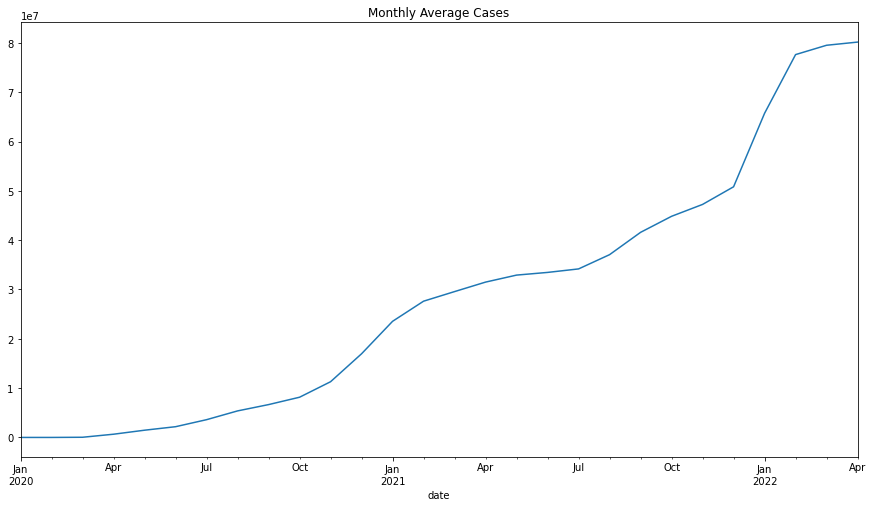

In [28]:
# Are cases increasing or decreasing? Oh my!
plt.figure(figsize = (15,8))
covid['actuals.cases'].resample('M').mean().plot(title='Monthly Average Cases');

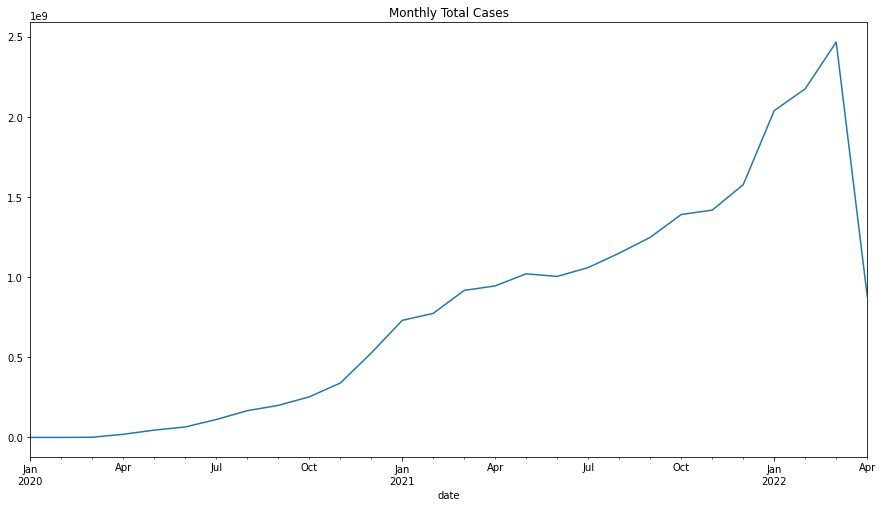

In [29]:
plt.figure(figsize = (15,8))
covid['actuals.cases'].resample('M').sum().plot(title='Monthly Total Cases');

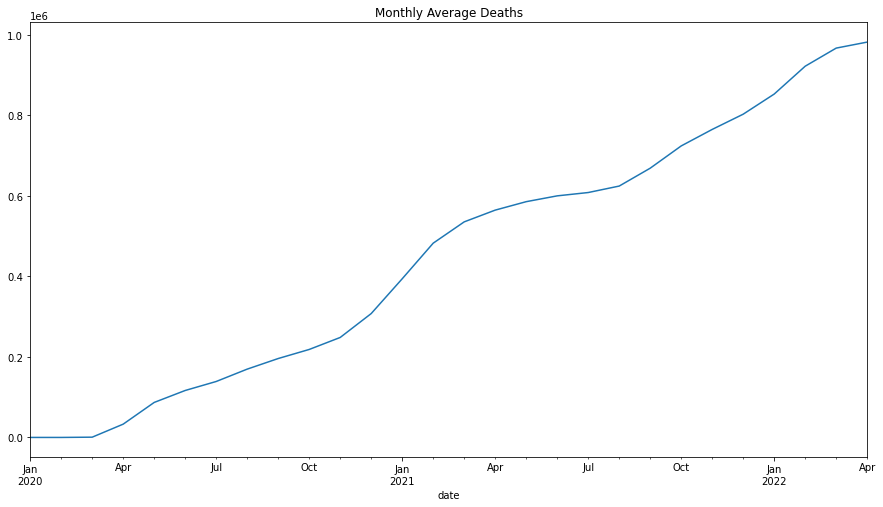

In [30]:
# Are deaths increaing steeply or slowly?
plt.figure(figsize = (15,8))
covid['actuals.deaths'].resample('M').mean().plot(title='Monthly Average Deaths');

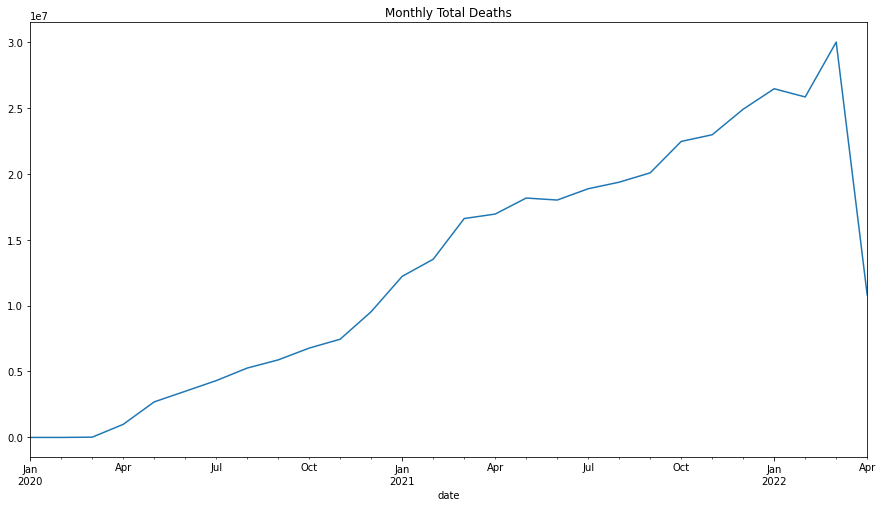

In [31]:
plt.figure(figsize = (15,8))
covid['actuals.deaths'].resample('M').sum().plot(title='Monthly Total Deaths');

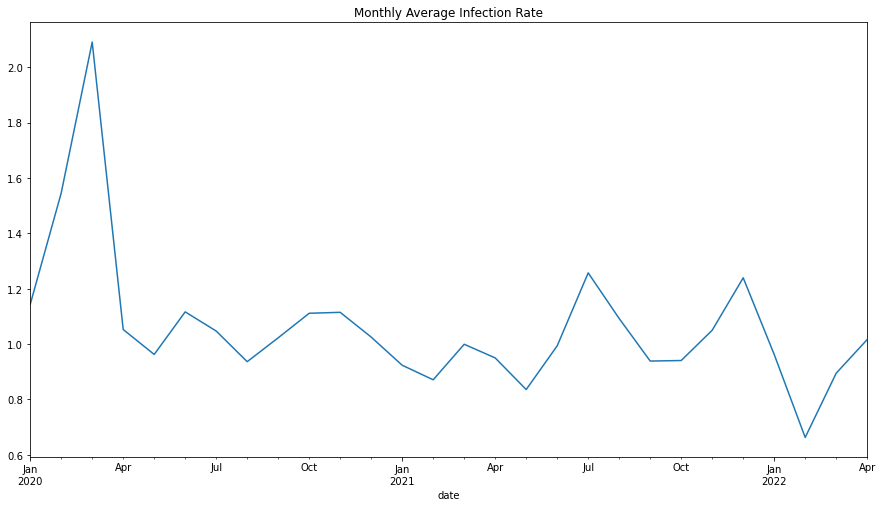

In [32]:
plt.figure(figsize = (15,8))
covid['metrics.infectionRate'].resample('M').mean().plot(title='Monthly Average Infection Rate');

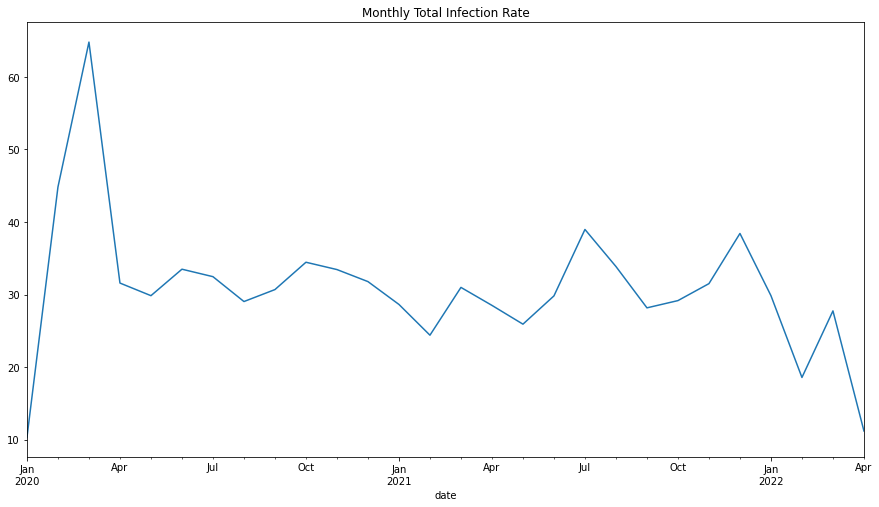

In [33]:
plt.figure(figsize = (15,8))
covid['metrics.infectionRate'].resample('M').sum().plot(title='Monthly Total Infection Rate');

## Current Month Stats

In [34]:
current = covid['Apr 2022']
current

,actuals.cases,actuals.deaths,actuals.positiveTests,actuals.negativeTests,actuals.contactTracers,actuals.newCases,metrics.testPositivityRatio,metrics.caseDensity,metrics.contactTracerCapacityRatio,metrics.infectionRate,metrics.infectionRateCI90,riskLevels.overall,actuals.newDeaths,riskLevels.caseDensity,cdcTransmissionLevel,metrics.weeklyNewCasesPer100k
date,,,,,,,,,,,,,,,,
2022-04-01,80036620,979881,76559459.00,754931477.00,NaN,32435.00,0.03,8.80,NaN,1.01,0.10,1,645.00,1,2,61.30
2022-04-02,80048015,980018,76576331.00,755481700.00,NaN,11395.00,0.03,8.70,NaN,1.01,0.10,1,137.00,1,2,61.10
2022-04-03,80052942,980057,76590054.00,755750247.00,NaN,4927.00,0.03,8.60,NaN,1.01,0.10,1,39.00,1,2,60.30
2022-04-04,80093982,980682,NaN,NaN,NaN,41040.00,NaN,8.60,NaN,1.01,0.10,1,625.00,1,2,59.90
2022-04-05,80124875,981146,NaN,NaN,NaN,30893.00,NaN,8.80,NaN,1.02,0.10,1,464.00,1,2,61.50
2022-04-06,80174198,982263,NaN,NaN,NaN,49323.00,NaN,9.00,NaN,1.02,0.10,1,1117.00,1,2,62.70
2022-04-07,80209904,982971,NaN,NaN,NaN,35706.00,NaN,8.90,NaN,1.02,0.10,1,708.00,1,2,62.10
2022-04-08,80254032,983435,NaN,NaN,NaN,44128.00,NaN,9.40,NaN,1.02,0.10,1,464.00,1,2,65.60
2022-04-09,80267553,983707,NaN,NaN,NaN,13521.00,NaN,9.50,NaN,1.02,0.10,1,272.00,1,2,66.20


In [35]:
# Total cases added this months
total_actual_cases = current['actuals.cases'].max() - current['actuals.cases'].min()
print(f"Total Cases in {current.index.month_name()[0]}: {total_actual_cases}.")

Total Cases in April: 288509.


In [36]:
# Total deaths added this months
total_actual_deaths = current['actuals.deaths'].max() - current['actuals.deaths'].min()
print(f"Total Deaths in {current.index.month_name()[0]}: {total_actual_deaths}.")

Total Deaths in April: 4286.


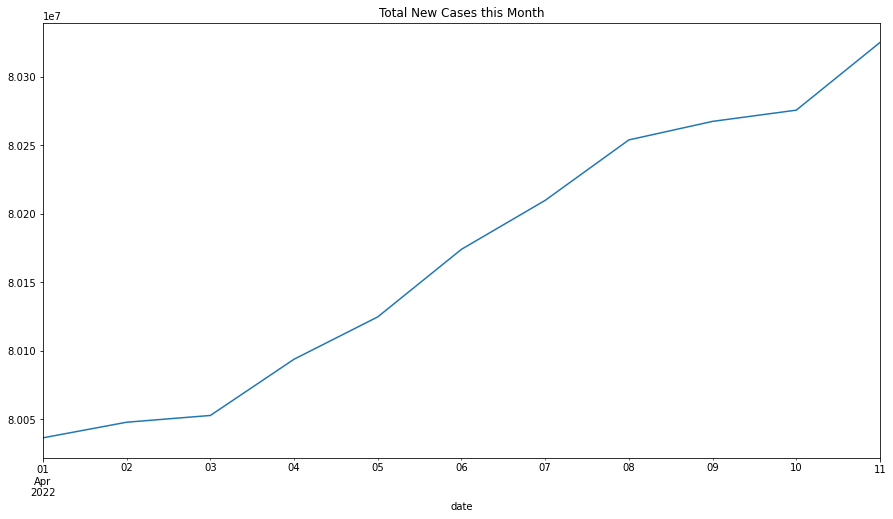

In [52]:
# Number of cases this month
plt.figure(figsize = (15,8))
current['actuals.cases'].plot(title='Total New Cases this Month');

### The chart below shows there is "seasonality" with the weekends. There is a dramatic dip on Sundays, with a steep increase on Mondays.

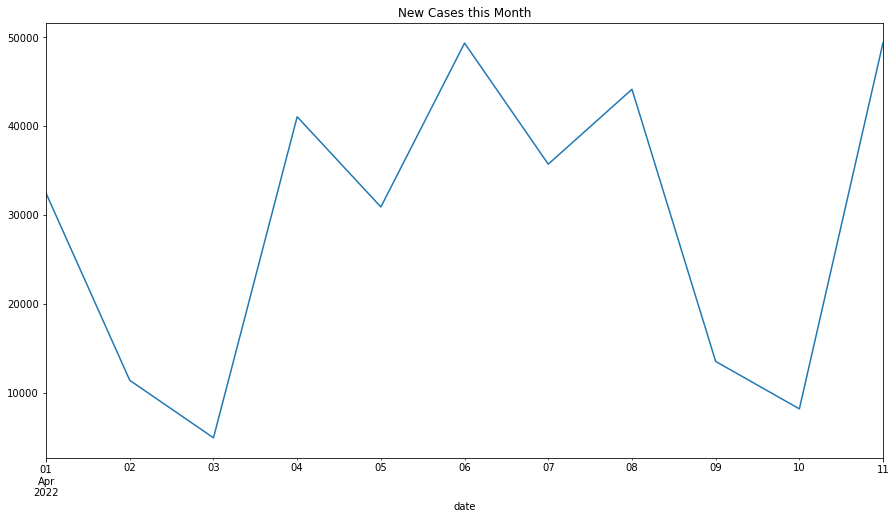

In [38]:
# Number of cases teach day
plt.figure(figsize = (15,8))
current['actuals.newCases'].plot(title='New Cases this Month');

## Texas

In [40]:
texas = states[states.state == 'TX']

In [41]:
# Making index a datetime
texas['date']= texas.index

# First make sure the column you want is a datetime type
texas.date = pd.to_datetime(texas.date)

# Then sort the rows by the date and set the index as that date
texas = texas.set_index("date").sort_index()

texas.head()

,country,state,county,fips,lat,long,locationId,actuals.cases,actuals.deaths,actuals.positiveTests,actuals.negativeTests,actuals.contactTracers,actuals.hospitalBeds.capacity,actuals.hospitalBeds.currentUsageTotal,actuals.hospitalBeds.currentUsageCovid,unused1,actuals.icuBeds.capacity,actuals.icuBeds.currentUsageTotal,actuals.icuBeds.currentUsageCovid,unused2,actuals.newCases,actuals.vaccinesDistributed,actuals.vaccinationsInitiated,actuals.vaccinationsCompleted,metrics.testPositivityRatio,metrics.testPositivityRatioDetails,metrics.caseDensity,metrics.contactTracerCapacityRatio,metrics.infectionRate,metrics.infectionRateCI90,unused3,unused4,metrics.icuCapacityRatio,riskLevels.overall,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,actuals.newDeaths,actuals.vaccinesAdministered,riskLevels.caseDensity,cdcTransmissionLevel,actuals.vaccinationsAdditionalDose,metrics.vaccinationsAdditionalDoseRatio,metrics.weeklyNewCasesPer100k,hsa,hsaPopulation,actuals.hsaHospitalBeds.capacity,actuals.hsaHospitalBeds.currentUsageTotal,actuals.hsaHospitalBeds.currentUsageCovid,actuals.hsaIcuBeds.capacity,actuals.hsaIcuBeds.currentUsageTotal,actuals.hsaIcuBeds.currentUsageCovid,metrics.bedsWithCovidPatientsRatio,hsaName,actuals.hospitalBeds.weeklyCovidAdmissions,actuals.hsaHospitalBeds.weeklyCovidAdmissions,metrics.weeklyCovidAdmissionsPer100k,communityLevels.cdcCommunityLevel,communityLevels.canCommunityLevel
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-12,US,TX,NaN,48,NaN,NaN,iso1:us#iso2:us-tx,1.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-13,US,TX,NaN,48,NaN,NaN,iso1:us#iso2:us-tx,2.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0.00,NaN,0,0,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-14,US,TX,NaN,48,NaN,NaN,iso1:us#iso2:us-tx,2.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,1.06,1.06,NaN,NaN,NaN,0,NaN,NaN,0.00,NaN,0,0,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-15,US,TX,NaN,48,NaN,NaN,iso1:us#iso2:us-tx,2.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,1.07,1.05,NaN,NaN,NaN,0,NaN,NaN,0.00,NaN,0,0,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-16,US,TX,NaN,48,NaN,NaN,iso1:us#iso2:us-tx,2.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,1.08,1.05,NaN,NaN,NaN,0,NaN,NaN,0.00,NaN,0,0,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Dropping columns with too many null values
print(texas.shape)
texas = drop_null_columns(texas)
print(texas.shape)
texas.head()

(790, 58)
(790, 31)


,country,state,fips,locationId,actuals.cases,actuals.deaths,actuals.positiveTests,actuals.negativeTests,actuals.contactTracers,actuals.hospitalBeds.capacity,actuals.hospitalBeds.currentUsageTotal,actuals.hospitalBeds.currentUsageCovid,actuals.icuBeds.capacity,actuals.icuBeds.currentUsageTotal,actuals.icuBeds.currentUsageCovid,actuals.newCases,metrics.testPositivityRatio,metrics.caseDensity,metrics.contactTracerCapacityRatio,metrics.infectionRate,metrics.infectionRateCI90,metrics.icuCapacityRatio,riskLevels.overall,actuals.newDeaths,riskLevels.caseDensity,cdcTransmissionLevel,metrics.weeklyNewCasesPer100k,metrics.bedsWithCovidPatientsRatio,actuals.hospitalBeds.weeklyCovidAdmissions,metrics.weeklyCovidAdmissionsPer100k,communityLevels.canCommunityLevel
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-12,US,TX,48,iso1:us#iso2:us-tx,1.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0,NaN,0,0,0.00,NaN,NaN,NaN,NaN
2020-02-13,US,TX,48,iso1:us#iso2:us-tx,2.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,0.00,NaN,NaN,NaN,NaN,0,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2020-02-14,US,TX,48,iso1:us#iso2:us-tx,2.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN,1.06,1.06,NaN,0,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2020-02-15,US,TX,48,iso1:us#iso2:us-tx,2.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN,1.07,1.05,NaN,0,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2020-02-16,US,TX,48,iso1:us#iso2:us-tx,2.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN,1.08,1.05,NaN,0,0.00,0,0,0.00,NaN,NaN,NaN,NaN


In [43]:
# All fips locations are the same value
# I can drop this column
texas.fips.value_counts()

48    790
Name: fips, dtype: int64

In [44]:
# Total cases added this month
total_texas_cases = texas['actuals.cases'].max() - texas['actuals.cases'].min()
print(f"Total Covid Cases in Texas: {total_texas_cases}.")
print(f"Percentage of US cases: {(total_texas_cases / covid['actuals.cases'].max())*100:.2f}%") 

Total Covid Cases in Texas: 6667762.0.
Percentage of US cases: 8.30%


In [45]:
# Total deaths added this month
total_texas_deaths = texas['actuals.deaths'].max() - texas['actuals.deaths'].min()
print(f"Total Covid-related Deaths in Texas: {total_texas_deaths}.")
print(f"Percentage of US deaths: {(total_texas_deaths / covid['actuals.deaths'].max())*100:.2f}%") 

Total Covid-related Deaths in Texas: 87801.0.
Percentage of US deaths: 8.92%


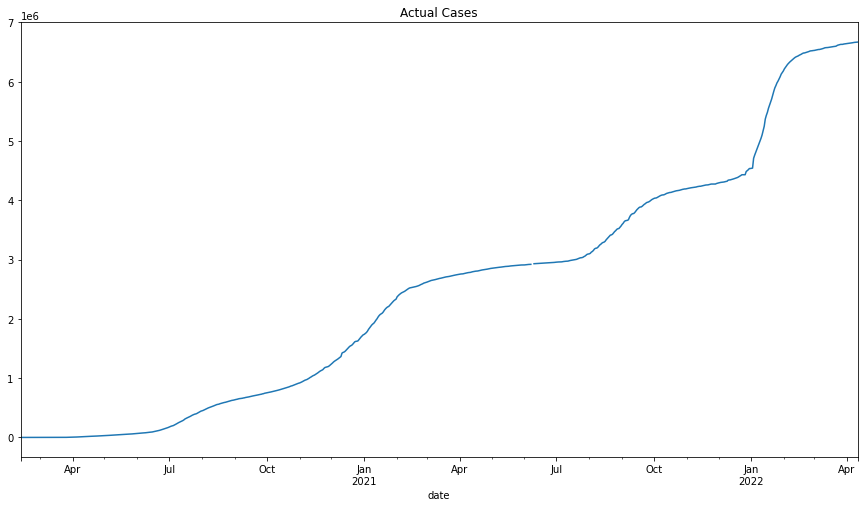

In [46]:
# Number of cases this month
plt.figure(figsize = (15,8))
texas['actuals.cases'].plot(title='Actual Cases');

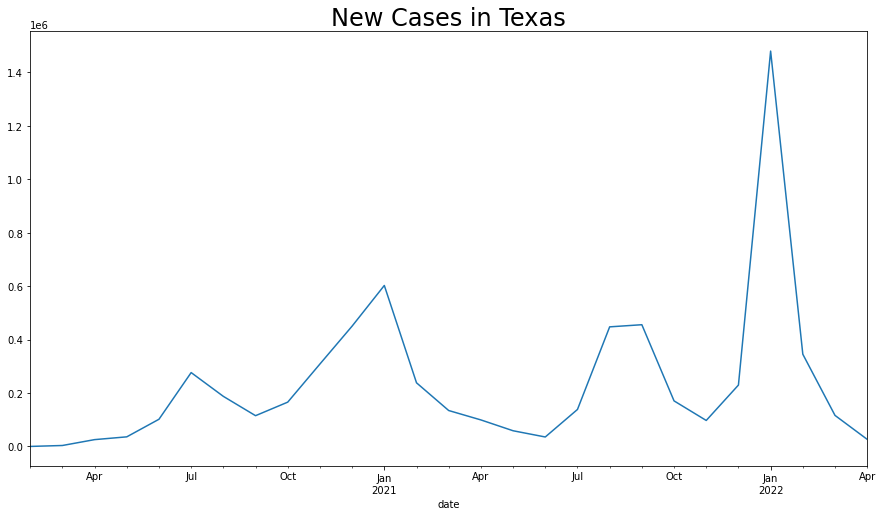

In [47]:
plt.figure(figsize = (15,8))
texas['actuals.newCases'].resample('M').sum().plot()
plt.title('New Cases in Texas', fontdict={'fontsize': 24});

In [48]:
texas.head()

,country,state,fips,locationId,actuals.cases,actuals.deaths,actuals.positiveTests,actuals.negativeTests,actuals.contactTracers,actuals.hospitalBeds.capacity,actuals.hospitalBeds.currentUsageTotal,actuals.hospitalBeds.currentUsageCovid,actuals.icuBeds.capacity,actuals.icuBeds.currentUsageTotal,actuals.icuBeds.currentUsageCovid,actuals.newCases,metrics.testPositivityRatio,metrics.caseDensity,metrics.contactTracerCapacityRatio,metrics.infectionRate,metrics.infectionRateCI90,metrics.icuCapacityRatio,riskLevels.overall,actuals.newDeaths,riskLevels.caseDensity,cdcTransmissionLevel,metrics.weeklyNewCasesPer100k,metrics.bedsWithCovidPatientsRatio,actuals.hospitalBeds.weeklyCovidAdmissions,metrics.weeklyCovidAdmissionsPer100k,communityLevels.canCommunityLevel
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-12,US,TX,48,iso1:us#iso2:us-tx,1.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0,NaN,0,0,0.00,NaN,NaN,NaN,NaN
2020-02-13,US,TX,48,iso1:us#iso2:us-tx,2.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,0.00,NaN,NaN,NaN,NaN,0,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2020-02-14,US,TX,48,iso1:us#iso2:us-tx,2.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN,1.06,1.06,NaN,0,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2020-02-15,US,TX,48,iso1:us#iso2:us-tx,2.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN,1.07,1.05,NaN,0,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2020-02-16,US,TX,48,iso1:us#iso2:us-tx,2.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN,1.08,1.05,NaN,0,0.00,0,0,0.00,NaN,NaN,NaN,NaN


## Is there a state that is the worst?

In [72]:
# make a list of states to loop through
list_of_states = states.state.unique()

# Make first entry as a dictionary
state_cases = pd.DataFrame(data=[{'state': list_of_states[0], 
                                    'total_cases': (states[states.state == list_of_states[0]]['actuals.newCases'].sum()) }])

for x in list_of_states[1:]:
    # for each state, add total cases to df
    state_cases = state_cases.append({'state': x, 
                                        'total_cases': (states[states.state == x]['actuals.newCases'].sum()) }, ignore_index=True)


state_cases

,state,total_cases
0,AK,241397.00
1,AL,1260531.00
2,AR,830442.00
3,AZ,2001347.00
4,CA,8999822.00
5,CO,1366032.00
6,CT,737294.00
7,DC,137376.00
8,DE,256815.00
9,FL,5900882.00


In [81]:
# State with the most cases
state_cases[state_cases.total_cases == state_cases.total_cases.max()]

,state,total_cases
4,CA,8999822.00


In [82]:
# States with the least cases
state_cases[state_cases.total_cases == state_cases.total_cases.min()]

,state,total_cases
25,MP,11264.00


MP is abbreviation for Northern Mariana Islands

---
# Modeling
---

### Baseline Model

In [49]:
# code here

---
# Evaluate
---

In [50]:
# code here

---
# Conclusion
---

Summary goes here